# Example 1: Measuring size and pigmentation of isopods  

In this example the goal is to measure measure phenotypic distributions of several speciemens of isopods (*Asellus aquaticus*) in one processing step. We also use the image-registration algorithm in `detect_reference` to find a reference card and automatically size and colour-correct the image.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6">
    
![Before](_figures/ex1_before.jpg)
    
**Input** - Freshwater isopod, alive, photographed on a white resin-tray from a camera stand. 
</div>
<div class="col-md-6">

![After](_figures/ex1_after.jpg)
    
**Results** - Isopod shape, size and colour are extracted (and size referenced using the reference card) 
</div>
</div>

## Background

This was the workflow for a master's project where we quickly needed to measure the phenotypic distribution (pigmentation [as grayscale] and size) before adding multiple batches of live isopods to a predation experiment. We photographed the isopods on a camera stand using a Canon EOS 750d DLSR with a 15-45mm lens and using LED light panels for better illumination.

![phenotyping setup](_figures/ex1_camera_stand.jpg)

## Preparation

This first step creates the necessary working directories and attempts to retrive the configuration template from the online repository, or your own machine, if you downloaded the repo.  

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "example1"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery-" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery-example1.yaml


## Example project

In [2]:
proj = pp.Project("project")

--------------------------------------------
Found existing phenopype project directory at:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project

overwrite (y/n)?y

"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project" created (overwritten)

Project "project" successfully created.
--------------------------------------------


In [3]:
## add all isopod-images from the data folder
proj.add_files(image_dir = r"../../gallery/data", include="isopods")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: isopods, exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image isopods1.jpg - phenopype-project folder 0__isopods1 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\isopods1.jpg
Found image isopods2.jpg - phenopype-project folder 0__isopods2 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\isopods2.jpg
Found image isopods3.jpg - phenopype-project folder 0__isopods3 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\isopods3.jpg
Found image isopods4.jpg - phenopype-project folder 0__isopods4 created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\isopods4.jpg

Found 4 files
--------------------------------------------


In [4]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods1\pype_config_v1.yaml
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods2\pype_config_v1.yaml
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods3\pype_config_v1.yaml
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods4\pype_config_v1.yaml


In [5]:
## set the project-wide reference. the reference has its own tag, in case your project uses multiple reference cards
proj.add_reference(reference_image_path= r"../../gallery/data/isopods1.jpg", reference_tag="iso-scale")

remove
Reference set
Reference image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\reference\iso-scale_full_image.tif
Reference image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\reference\iso-scale_search_template.tif
Saved reference info to project attributes.
setting active global project reference to "iso-scale" for 0__isopods1 (active=True)
setting active global project reference to "iso-scale" for 0__isopods2 (active=True)
setting active global project reference to "iso-scale" for 0__isopods3 (active=True)
setting active global project reference to "iso-scale" for 0__isopods4 (active=True)


In [6]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath

AUTOLOAD
- reference template image loaded from root directory
updating pype config file


------------+++ new pype iteration 2022-01-14 13:44:08 +++--------------




PREPROCESSING
create_mask
incompatible annotation type supplied - need "mask" type
detect_reference
---------------------------------------------------
Reference card found with 236 keypoint matches:
template image has 27.162 pixel per mm.
current image has 27.184 pixel per mm.
= 100.082 %% of template image.
---------------------------------------------------
blur


SEGMENTATION
threshold
- decompose image: using green channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
morphology
detect_contour
incompatible annotation type supplied - need "drawing" type
- found 20 contours that match criteria
edit_contour
- "contour_id" not provided: using last annotation of type "contour" with ID "a"
incompatible annotation type supplied - need "drawing" type
detect_contour
- "drawi

Processing gray channel texture features: 100%|████████████████████████████████████████| 20/20 [00:00<00:00, 41.74it/s]




VISUALIZATION
select_canvas
- invalid selection - defaulting to raw image
draw_contour
- "contour_id" not provided: using last annotation of type "contour" with ID "b"
draw_mask
- "mask_id" not provided: using last annotation of type "mask" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods1\canvas_v1.jpg.
save_annotation
- creating new annotation file
- writing annotation of type "mask" with id "a" to "annotations_v1.json"
- writing annotation of type "reference" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "b" to "annotations_v1.json"
- writing annotation of type "drawing" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "a" to "annotation

Processing gray channel texture features: 100%|████████████████████████████████████████| 15/15 [00:00<00:00, 41.14it/s]




VISUALIZATION
select_canvas
- invalid selection - defaulting to raw image
draw_contour
- "contour_id" not provided: using last annotation of type "contour" with ID "b"
draw_mask
- "mask_id" not provided: using last annotation of type "mask" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods2\canvas_v1.jpg.
save_annotation
- creating new annotation file
- writing annotation of type "mask" with id "a" to "annotations_v1.json"
- writing annotation of type "reference" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "b" to "annotations_v1.json"
- writing annotation of type "drawing" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "a" to "annotation

Processing gray channel texture features: 100%|████████████████████████████████████████| 20/20 [00:00<00:00, 41.58it/s]




VISUALIZATION
select_canvas
- invalid selection - defaulting to raw image
draw_contour
- "contour_id" not provided: using last annotation of type "contour" with ID "b"
draw_mask
- "mask_id" not provided: using last annotation of type "mask" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods3\canvas_v1.jpg.
save_annotation
- creating new annotation file
- writing annotation of type "mask" with id "a" to "annotations_v1.json"
- writing annotation of type "reference" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "b" to "annotations_v1.json"
- writing annotation of type "drawing" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "a" to "annotation

Processing gray channel texture features: 100%|████████████████████████████████████████| 13/13 [00:00<00:00, 40.56it/s]




VISUALIZATION
select_canvas
- invalid selection - defaulting to raw image
draw_contour
- "contour_id" not provided: using last annotation of type "contour" with ID "b"
draw_mask
- "mask_id" not provided: using last annotation of type "mask" with ID "a"
draw_reference
- "reference_id" not provided: using last annotation of type "reference" with ID "a"


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\data\0__isopods4\canvas_v1.jpg.
save_annotation
- creating new annotation file
- writing annotation of type "mask" with id "a" to "annotations_v1.json"
- writing annotation of type "reference" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "b" to "annotations_v1.json"
- writing annotation of type "drawing" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "a" to "annotation


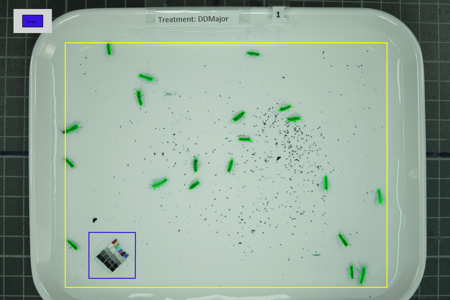
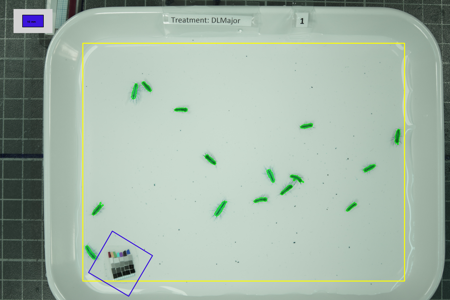
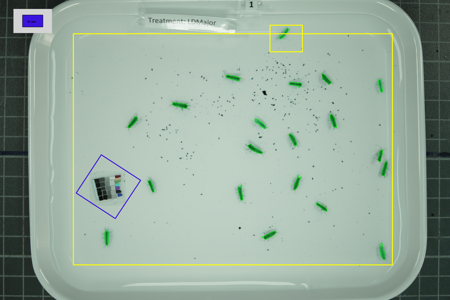
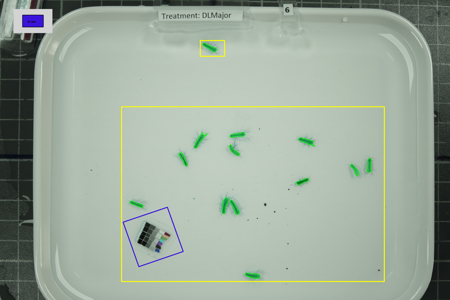


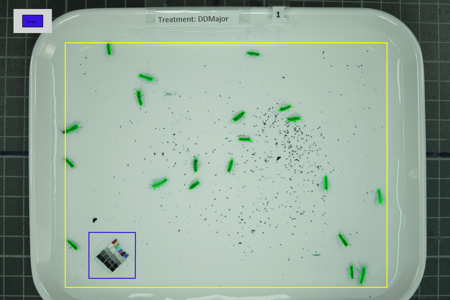
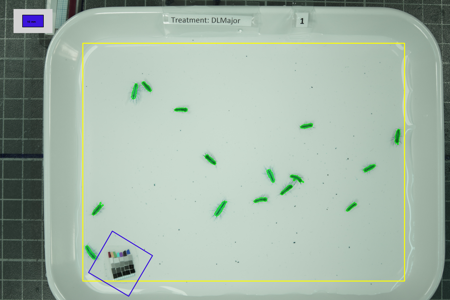
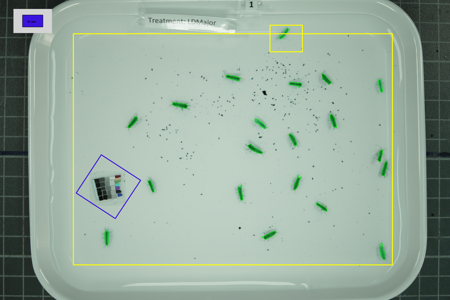
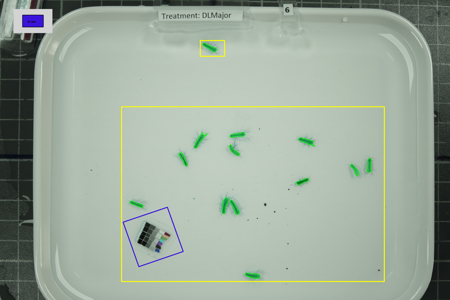

In [7]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg")))

ipyplot.plot_images(canvas_list, max_images=4, img_width=450)


In [8]:
proj.collect_results("v1", "annotations", "annotations")


Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__isopods1
0__isopods1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\results\annotations\0__isopods1_annotations_v1.json.
Collected annotations_v1.json from 0__isopods2
0__isopods2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\results\annotations\0__isopods2_annotations_v1.json.
Collected annotations_v1.json from 0__isopods3
0__isopods3_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\results\annotations\0__isopods3_annotations_v1.json.
Collected annotations_v1.json from 0__isopods4
0__isopods4_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\example1\project\results\annotations\0__isopods4_annotations_v